## Survival Analysis in Python

sas7bdat for Python: https://pypi.python.org/pypi/sas7bdat

Raw data: ftp://ftp.wiley.com/public/sci_tech_med/survival

- lifelines-0.8.0.2
- sas7bdat 2.0.6

Ref
- http://www.ats.ucla.edu/stat/sas/seminars/sas_survival/
- whas500 coding book https://www.umass.edu/statdata/statdata/data/whas500.txt
- Hosmer, D.W. and Lemeshow, S. and May, S. (2008) Applied Survival Analysis: Regression Modeling of Time to Event Data: Second Edition, John Wiley and Sons Inc., New York, NY

### Data from the Worcester Heart Attack Study whose main goal was to describe factors associated with trends over time in the incidence and survival rates following hospital admission for acute myocardial infarction.

In [3]:
import pandas 
from sas7bdat import SAS7BDAT
data_whas = '/Users/wlsherica/Documents/ElasticMining/whas500.sas7bdat'
data_out = '/Users/wlsherica/Documents/ElasticMining/whas500.csv'
f = SAS7BDAT(data_whas)
df = f.to_data_frame()

df.to_csv(data_out, sep='\t')

In [9]:
# n = 500
df.head(3)

,ID,AGE,GENDER,HR,SYSBP,DIASBP,BMI,CVD,AFB,SHO,CHF,AV3,MIORD,MITYPE,YEAR,LOS,DSTAT,LENFOL,FSTAT
0,1,83,0,89,152,78,25.540510,1,1,0,0,0,1,0,1,5,0,2178,0
1,2,49,0,84,120,60,24.023979,1,0,0,0,0,0,1,1,5,0,2172,0
2,3,70,1,83,147,88,22.142900,0,0,0,0,0,0,1,1,5,0,2190,0


- lenfol: length of followup, terminated either by death or censoring. The outcome in this study.
- fstat: the censoring variable, loss to followup=0, death=1
- age: age at hospitalization
- bmi: body mass index
- hr: initial heart rate
- gender: males=0, females=1

In [7]:
# Load python libraries
import numpy as np
import pandas as pd
import lifelines as ll

from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt

#import plotly.plotly as py
#import plotly.tools as tls   
#from plotly.graph_objs import *

#larger
from pylab import rcParams
rcParams['figure.figsize']=10, 5

KaplanMeierFitter.fit(event_times, event_observed=None,
                      timeline=None, label='KM-estimate',
                      alpha=None)
Parameters:
-  event_times: an array, or pd.Series, of length n of times that the death event occured at
-  event_observed: an array, or pd.Series, of length n -- True if the death was observed, False if the event was lost (right-censored). Defaults all True if event_observed==None
-  timeline: set the index of the survival curve to this postively increasing array.
-  label: a string to name the column of the estimate.
-  alpha: the alpha value in the confidence intervals. Overrides the initializing alpha for this call to fit only.

Returns: self, with new properties like 'survival_function_'.

In [35]:
from lifelines.estimation import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = df['LENFOL']
C = df['FSTAT']

#kmf.fit(observed_lifetimes, event_observed=C)
kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 500 observations, 285 censored>

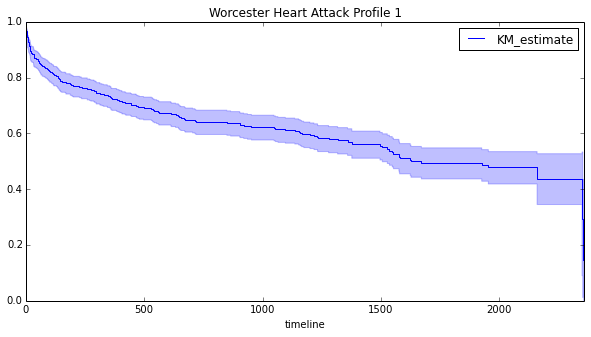

In [36]:
# fitter methods have an internal plotting method.
# plot the curve with the confidence intervals
kmf.plot(title='Worcester Heart Attack Profile 1')

How do we interpret this? The y-axis represents the probability a leader is still around after t days, where t days is on the x-axis. The survival function is undefined past this final interval at 2358 days. The blue-shaded area around the survival curve represents the 95% confidence band.

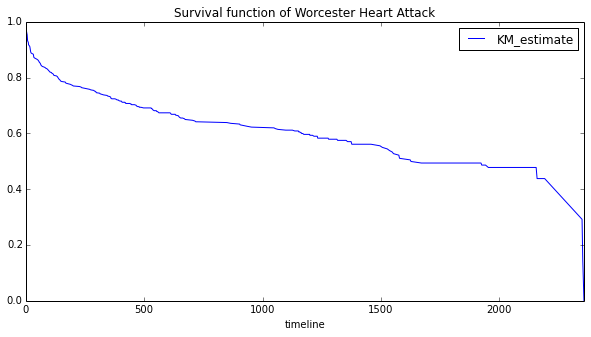

In [37]:
kmf.fit(T, event_observed=C)
kmf.survival_function_.plot()
plt.title('Survival function of Worcester Heart Attack');

In [38]:
kmf.median_
# we see that the median user stays X days which is realistic

1627.0

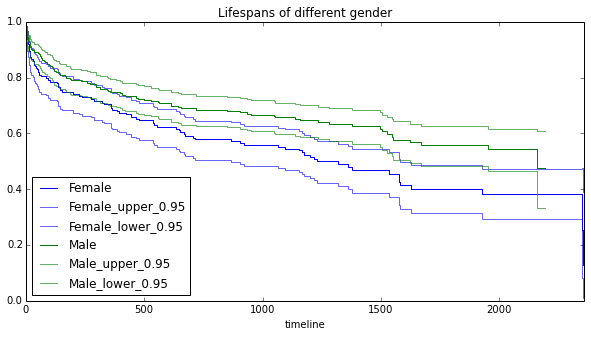

In [39]:
ax = plt.subplot(111)

T0 = df['LENFOL']
C0 = df['FSTAT']

dem = (df["GENDER"] == 1)
kmf.fit(T0[dem], event_observed=C0[dem], label="Female")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T0[~dem], event_observed=C0[~dem], label="Male")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0,1)
plt.title("Lifespans of different gender")

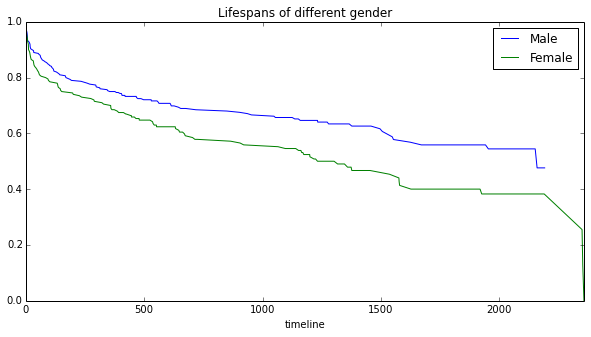

In [40]:
#male
f = df.GENDER==0
T = df[f]['LENFOL']
C = df[f]['FSTAT']
#female
f2 = df.GENDER==1
T2 = df[f2]['LENFOL']
C2 = df[f2]['FSTAT']

ax = plt.subplot(111)

kmf.fit(T, event_observed=C, label=['Male'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T2, event_observed=C2, label=['Female'])
kmf.survival_function_.plot(ax=ax)

plt.title('Lifespans of different gender')

kmf2 = plt.gcf()

In [41]:
# The function logrank_test is a common statistical test in survival analysis that 
#compares two event series’ generators.
from lifelines.statistics import logrank_test

results = logrank_test(T0[dem], T0[~dem], C0[dem], C0[~dem], alpha=.95 )
results.print_summary()

Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00525 |              7.791 |      Reject Null    |        True       


In [68]:
def label_race(row):
   if row['YEAR'] == 1 :
      return 'One'
   if row['YEAR'] == 2:
      return 'Two'
   if row['YEAR'] == 3 :
      return 'Three'

df2 = df
df2['YEAR_G'] = df2.apply (lambda row: label_race (row),axis=1)
df2.head(2)

,ID,AGE,GENDER,HR,SYSBP,DIASBP,BMI,CVD,AFB,SHO,CHF,AV3,MIORD,MITYPE,YEAR,LOS,DSTAT,LENFOL,FSTAT,YEAR_G
0,1,83,0,89,152,78,25.540510,1,1,0,0,0,1,0,1,5,0,2178,0,One
1,2,49,0,84,120,60,24.023979,1,0,0,0,0,0,1,1,5,0,2172,0,One


In [69]:
df2.groupby( ["YEAR_G"] ).count()

,ID,AGE,GENDER,HR,SYSBP,DIASBP,BMI,CVD,AFB,SHO,CHF,AV3,MIORD,MITYPE,YEAR,LOS,DSTAT,LENFOL,FSTAT
YEAR_G,,,,,,,,,,,,,,,,,,,
One,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
Three,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
Two,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188


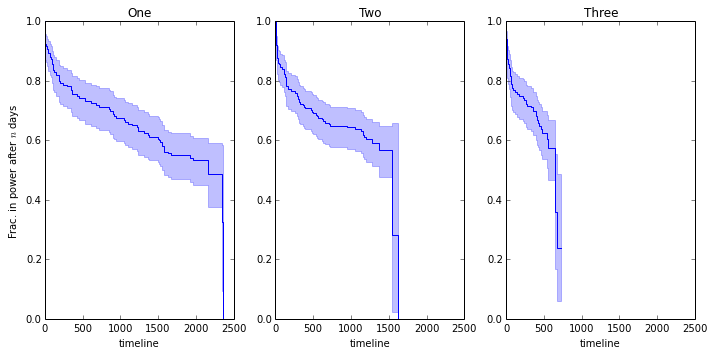

In [71]:
regime_types = df2['YEAR_G'].unique()

T3 = df2['LENFOL']
C3 = df2['FSTAT']

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(1,3,i+1)
    ix = df['YEAR_G'] == regime_type 
    kmf.fit(T3[ix], C3[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0,2500)
    if i==0:
        plt.ylabel('Frac. in power after $n$ days')
plt.tight_layout()